## Random Forest Classification

<img src="figures/rf_intro.png" alt="mloverview" class="bg-primary" width="700px">

### Random Forest Tutorial Aims:

* Random Forest classification with scikit-learn
* How random forests work
* How to use them for regression
* How to evaluate their performance (& tune Hyper-parameters)


### What is a Random Forest?


* RF are built by combining mulitple DT (ensemble of decision trees to predict target variables)
* RFs combine simplicity of DTs with flexiblity --> therefore improved accuracy
* RFs are for supervised machine learning, where there is a labeled target variable.
* RFs can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
* RFs are an ensemble method, meaning they combine predictions from other models.


<img src="figures/rf_1.png" alt="mloverview" class="bg-primary" width="700px">





### How does it work?

A Random forest regression model combines multiple decision trees to create a single model. Each tree in the forest builds from a different subset of the data and makes its own independent prediction. The final prediction for input is based on the average or weighted average of all the individual trees’ predictions.

> [Read here more on the theory.](https://www.analytixlabs.co.in/blog/random-forest-regression/#:~:text=using%20various%20techniques.-,Evaluating%20Random%20Forest%20Regression%20Performance,such%20as%20accuracy%20and%20precision.)
> 
> [Nice introductory video](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)

#### Step by Step: 

* 1. Create a "bootstrapped" dataset.
    * Randomly select samples from the original dataset. The same sample can be picked more than once.
* 2. Create a decision tree using that "bootstrapped" dataset. But only use a random subset of variables (columns) at each step.
*  3. Go back to 1 and repeat. Make a new bootstrapped dataset and built a tree on a subset of variables, resulting in a variaty of trees.
* 4. Running new data down all of the trees, results in a "vote" for the target variable.

<img src="figures/rf_2.png" alt="mloverview" class="bg-primary" width="700px">



> **Terminology**:
>> **Bagging**: **B**ootstrapping + Using the **Agg**regate to make a decision



### Evaluation

* 1/3 of the data does not end up in the "bootstrapped" dataset = **Out-Of-Bag** Dataset
* Evaluate all trees with the  **Out-Of-Bag** Dataset,
* proportion of incorrectly classified samples = **Out-Of-Bag Error** , **OOB**



### Example: Building a Random Forest

> Now, we will built a Random Forest by revisiting the example, we introduced in the decision tree script.
> Split data into target and features and perform the train-test-split (70-30).

In [1]:
%load_ext lab_black

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import (
    metrics,
)  # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [3]:
# load data

data = {
    "clouds": [1, 0, 1, 0, 0, 0, 1],
    "temp": [10, 20, -3, -5, 25, 10, 30],
    "rain": [1, 0, 0, 0, 0, 0, 1],
}
df = pd.DataFrame.from_dict(data)
df

,clouds,temp,rain
0,1,10,1
1,0,20,0
2,1,-3,0
3,0,-5,0
4,0,25,0
5,0,10,0
6,1,30,1


In [4]:
#### your code here ####

#### solution

In [5]:
# split dataset in features and target variable
feature_cols = ["clouds", "temp"]
X = df[feature_cols]  # Features
y = df.rain  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)  # 70% training and 30% test

### Model
 > Build the Random Forest Classfier an fit the model

In [6]:
# Importieren von Modulen/Bibliotheken
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Initialwert und Anzahl der Bäume für den Random Forest festlegen
seed = 196
n_estimators = 1000

# RandomForest erstellen, X und y definieren und Modell trainieren
model = RandomForestClassifier(
    n_estimators=n_estimators,
    random_state=seed,
    max_features=1.0,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None,
    oob_score=True,
)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=1.0, n_estimators=1000, oob_score=True,
                       random_state=196)

> **Exercise**: Evaluate the Random Forest
>
> Calculte the RMSE, OOB Score and plot the feature importance. Which one is more important to predict rain?

In [7]:
#### your code here ####

#### solution

In [8]:
# Mittelwert der quadrierten Residuen und erklärte Varianz ausgeben lassen
print(f"Mean of squared residuals: {model.score(X, y)}")
print(f"% Var explained: {model.score(X, y) * 100}")


print(f"% OOB score: {1 - model.oob_score_}")

Mean of squared residuals: 0.8571428571428571
% Var explained: 85.71428571428571
% OOB score: 0.25


In [9]:
# Statistiken über das Modell ausgeben lassen und die 10 wichtigsten Variablen extrahieren
stats = model.get_params()
feature_importance = model.feature_importances_
features = X.columns
var_imp_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
var_imp_df = var_imp_df.sort_values(by="Importance", ascending=False).head(54)
var_imp_10 = var_imp_df.head(10)

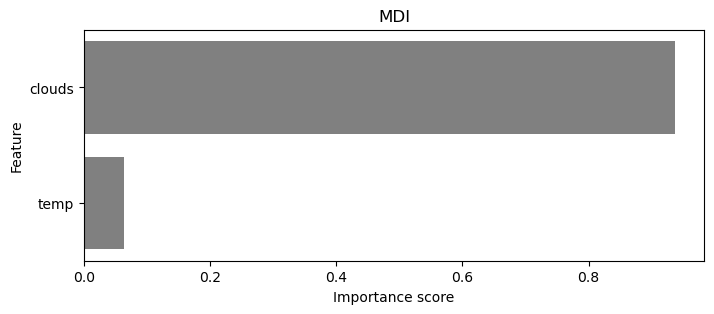

In [10]:
# Plotten der wichtigsten Variablen
plt.figure(figsize=(8, 3))
sns.barplot(x="Importance", y="Feature", data=var_imp_10, color="gray")
plt.title("MDI")
plt.xlabel("Importance score")
plt.ylabel("Feature")

plt.show()



<div>
<img src="5_RF_figures/bild1.png" width="700"/>
</div>

**Sample locations**

The data set and further information about the sampling process can be found
[here](https://doi.pangaea.de/10.1594/PANGAEA.944811).


Let us take a closer look at the data:

In [11]:
# Importieren der pandas- und requests-Bibliothek sowie des StringIO-Moduls
import pandas as pd
import requests
from io import StringIO

# Daten über URL einlesen
url = "https://doi.pangaea.de/10.1594/PANGAEA.944811?format=textfile"

response = requests.get(url)
IsoW06 = pd.read_csv(StringIO(response.text), sep = '\t', skiprows = 267, header = 1, encoding = "UTF-8", 
                     engine = 'python', on_bad_lines = 'skip')

In [12]:
# Anzeigen der ersten 6 Dateneinträge
IsoW06.head(6)

,Event,Sample ID,Latitude,Longitude,Date/Time,Samp type,Sample comment,δ18O H2O [‰ SMOW],δD H2O [‰ SMOW],δ18O H2O std dev [±],δD H2O std dev [±]
0,WaterSA_SLW1,SLW1,-33.88917,18.96917,2016-08-29,River,River at Pniel,-3.54,-14.50,0.09,0.64
1,WaterSA_SLW2,SLW2,-33.87800,19.03517,2016-08-29,River,River Berg; abundant with insect larvae; dam u...,-3.33,-13.62,0.09,0.45
2,WaterSA_SLW3,SLW3,-33.93667,19.17000,2016-08-29,River,Minor waterfall; iron rich,-4.44,-22.33,0.04,0.59
3,WaterSA_SLW4,SLW4,-33.69350,19.32483,2016-08-29,River,River; abundant with insect larvae,-4.28,-22.70,0.07,0.30
4,WaterSA_SLW5,SLW5,-33.54333,19.20733,2016-08-29,River,River Bree,-4.09,-18.99,0.04,0.34
5,WaterSA_SLW6,SLW6,-33.33367,19.87767,2016-08-30,Lake,Reservoir lake; under almost natural condition...,-2.59,-18.59,0.10,0.29


The data set contains 188 samples and the following 11 variables: 
Event, Sample ID, Latitude, Longitude, Date/Time, Samp type, Sample comment, δ18O H2O [‰ SMOW], δD H2O [‰ SMOW], δ18O H2O std dev [±], δD H2O std dev [±]. The isotope ratios are expressed in the conventional delta notation (δ18O, δ2H) in per mil (‰) relative to VSMOW ([Vienna Standard Mean Ocean Water](https://en.wikipedia.org/wiki/Vienna_Standard_Mean_Ocean_Water).

#### Ressources for this script: 

* [Koehrsen 2010](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)


In [13]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_marie.html",
    width=900,
    height=200,
)